In [1]:
import pandas as pd

# Load the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and summary statistics
data.head(), data.describe(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3658 non-null   int64  
 1   year        3658 non-null   int64  
 2   month       3658 non-null   int64  
 3   day         3658 non-null   int64  
 4   cycle       3658 non-null   float64
 5   trend       3658 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 171.6 KB


(   Unnamed: 0  year  month  day   cycle   trend
 0           0  2013      1   20  395.64  394.41
 1           1  2013      1   21  395.67  394.42
 2           2  2013      1   22  395.69  394.43
 3           3  2013      1   23  395.72  394.43
 4           4  2013      1   24  395.75  394.44,
        Unnamed: 0         year        month          day        cycle  \
 count  3658.00000  3658.000000  3658.000000  3658.000000  3658.000000   
 mean   1828.50000  2017.561236     6.514489    15.738928   406.594702   
 std    1056.11797     2.886931     3.453418     8.797849     7.309785   
 min       0.00000  2013.000000     1.000000     1.000000   392.600000   
 25%     914.25000  2015.000000     4.000000     8.000000   400.192500   
 50%    1828.50000  2018.000000     7.000000    16.000000   406.905000   
 75%    2742.75000  2020.000000    10.000000    23.000000   412.947500   
 max    3657.00000  2023.000000    12.000000    31.000000   419.610000   
 
              trend  
 count  3658.00

In [2]:
# Remove the 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Verify the changes
data_cleaned.head()


,year,month,day,cycle,trend
0,2013,1,20,395.64,394.41
1,2013,1,21,395.67,394.42
2,2013,1,22,395.69,394.43
3,2013,1,23,395.72,394.43
4,2013,1,24,395.75,394.44


In [3]:
data_cleaned.describe()

,year,month,day,cycle,trend
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,2017.561236,6.514489,15.738928,406.594702,406.593201
std,2.886931,3.453418,8.797849,7.309785,7.115691
min,2013.000000,1.000000,1.000000,392.600000,394.410000
25%,2015.000000,4.000000,8.000000,400.192500,399.872500
50%,2018.000000,7.000000,16.000000,406.905000,406.645000
75%,2020.000000,10.000000,23.000000,412.947500,412.907500
max,2023.000000,12.000000,31.000000,419.610000,418.330000


In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardizing the 'cycle' and 'trend' columns
data_cleaned[['cycle', 'trend']] = scaler.fit_transform(data_cleaned[['cycle', 'trend']])

# Display the first few rows to verify the standardization
data_cleaned.head()


,year,month,day,cycle,trend
0,2013,1,20,-1.498840,-1.712394
1,2013,1,21,-1.494736,-1.710988
2,2013,1,22,-1.491999,-1.709583
3,2013,1,23,-1.487895,-1.709583
4,2013,1,24,-1.483790,-1.708177


In [5]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def perform_adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Perform ADF test on the 'cycle' and 'trend' columns
print("ADF Test for 'cycle':")
perform_adf_test(data_cleaned['cycle'])

print("\nADF Test for 'trend':")
perform_adf_test(data_cleaned['trend'])

ADF Test for 'cycle':
ADF Statistic: -1.4351614591697868
p-value: 0.5653080782145562
The series is not stationary.

ADF Test for 'trend':
ADF Statistic: -0.4514848415948488
p-value: 0.9011412968240282
The series is not stationary.


In [6]:
# Applying first order differencing to the 'cycle' and 'trend' columns
data_cleaned['cycle_diff'] = data_cleaned['cycle'].diff().dropna()
data_cleaned['trend_diff'] = data_cleaned['trend'].diff().dropna()

# Drop the initial NaN values that result from differencing
data_cleaned.dropna(inplace=True)

# Display the first few rows to verify the changes
data_cleaned.head()


,year,month,day,cycle,trend,cycle_diff,trend_diff
1,2013,1,21,-1.494736,-1.710988,0.004105,0.001406
2,2013,1,22,-1.491999,-1.709583,0.002736,0.001406
3,2013,1,23,-1.487895,-1.709583,0.004105,0.000000
4,2013,1,24,-1.483790,-1.708177,0.004105,0.001406
5,2013,1,25,-1.479685,-1.706772,0.004105,0.001406


In [7]:
# Let's first re-check if the differenced series are stationary using the ADF test.
print("ADF Test for 'cycle_diff':")
perform_adf_test(data_cleaned['cycle_diff'])

print("\nADF Test for 'trend_diff':")
perform_adf_test(data_cleaned['trend_diff'])


ADF Test for 'cycle_diff':
ADF Statistic: -4.3079042250006445
p-value: 0.0004304185280271665
The series is stationary.

ADF Test for 'trend_diff':
ADF Statistic: -0.9735455786364152
p-value: 0.7627902639242041
The series is not stationary.


In [8]:
# Applying second order differencing to the 'trend_diff' column
data_cleaned['trend_diff2'] = data_cleaned['trend_diff'].diff().dropna()

# Drop the initial NaN values that result from the second differencing
data_cleaned.dropna(inplace=True)

# Perform ADF test on the second differenced 'trend_diff' column
perform_adf_test(data_cleaned['trend_diff2'])


ADF Statistic: -19.970363996160646
p-value: 0.0
The series is stationary.


In [ ]:
#arima

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model for 'cycle_diff' series
arima_model_cycle = ARIMA(data_cleaned['cycle_diff'], order=(1, 1, 1))
arima_result_cycle = arima_model_cycle.fit()

# Display the summary of the ARIMA model
arima_result_cycle.summary()


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             cycle_diff   No. Observations:                 3656
Model:                 ARIMA(1, 1, 1)   Log Likelihood               21075.412
Date:                Tue, 14 May 2024   AIC                         -42144.824
Time:                        13:04:44   BIC                         -42126.212
Sample:                             0   HQIC                        -42138.196
                               - 3656                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3479      0.024    -14.367      0.000      -0.395      -0.300
ma.L1         -0.4639      0.020    -23.347      0.000      -0.503      -0.425
sigma2      5.736e-07   1.55e-08     36.974      0.000    5.43e-07    6.04e-07
===================================================================================
Ljung-Box (L1) (Q):                  11.13   Jarque-Bera (JB):                 9.91
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.10   Skew:                             0.08
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

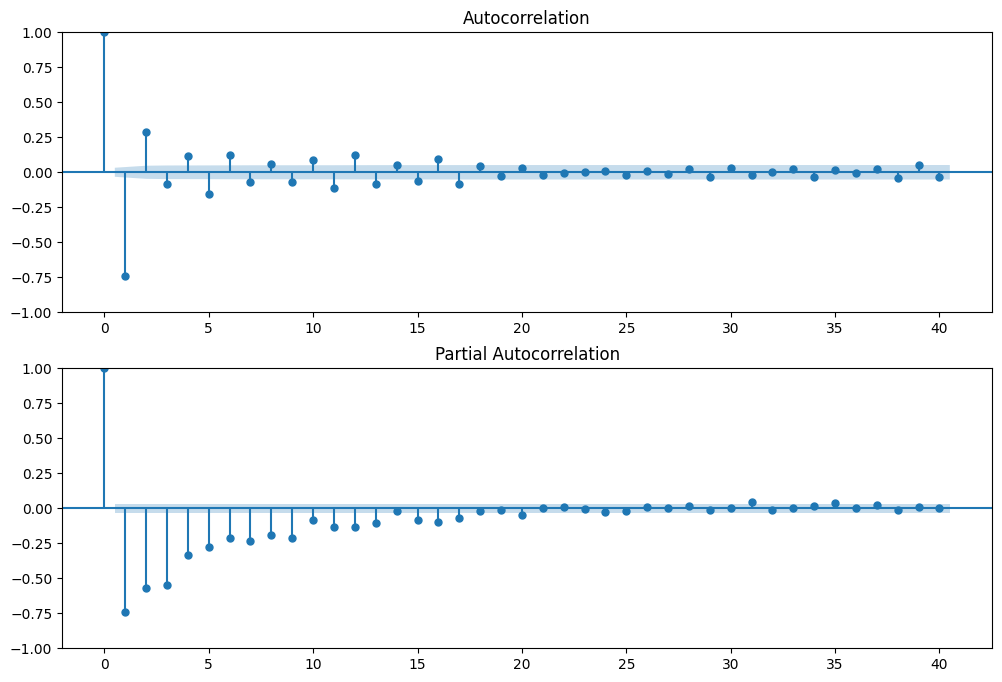

In [10]:
# Plot ACF and PACF for the 'trend_diff2' series
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_cleaned['trend_diff2'], lags=40, ax=ax1)
plot_pacf(data_cleaned['trend_diff2'], lags=40, ax=ax2)
plt.show()


In [11]:
# Fit the ARIMA model for 'trend_diff2' series
arima_model_trend = ARIMA(data_cleaned['trend_diff2'], order=(1, 2, 1))
arima_result_trend = arima_model_trend.fit()

# Display the summary of the ARIMA model for 'trend_diff2'
arima_result_trend.summary()


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            trend_diff2   No. Observations:                 3656
Model:                 ARIMA(1, 2, 1)   Log Likelihood               18843.922
Date:                Tue, 14 May 2024   AIC                         -37681.844
Time:                        13:05:35   BIC                         -37663.233
Sample:                             0   HQIC                        -37675.216
                               - 3656                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9587      0.016    -61.528      0.000      -0.989      -0.928
ma.L1         -0.9653      0.032    -29.977      0.000      -1.028      -0.902
sigma2      1.933e-06    8.8e-08     21.956      0.000    1.76e-06    2.11e-06
===================================================================================
Ljung-Box (L1) (Q):                 775.78   Jarque-Bera (JB):               396.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#visualization

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your forecast and historical data ready
historical_data = np.array(data_cleaned['cycle_diff'])  # Your actual data
forecast_data = np.array(forecast_cycle_values)         # Your forecast
forecast_index = np.arange(len(historical_data), len(historical_data) + len(forecast_data))

fig, ax = plt.subplots(figsize=(14, 7))

# Plot historical data
ax.plot(historical_data, label='Historical Differenced Data', color='blue', linewidth=2)

# Plot forecast data
ax.plot(forecast_index, forecast_data, label='Forecast', color='red', linewidth=2)

# Highlight the start of the forecast
ax.axvline(x=len(historical_data), color='gray', linestyle='--', label='Start of Forecast')

# Enhancements
ax.set_xlabel('Time')
ax.set_ylabel('Differenced CO2 Levels')
ax.set_title('Forecast of Differenced CO2 Cycle Data')
ax.grid(True)
ax.legend()

plt.show()

NameError: name 'forecast_cycle_values' is not defined

In [ ]:
#testing model

In [13]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the initial parameters
test_length = 365  # Assuming daily data and wanting a year for testing
num_folds = 3  # Define the number of folds

# Ensure data_series is the time series you want to forecast
data_series = data_cleaned['cycle_diff']  # Ensure this is your series data

# Total length of data must support the number of folds times the test length
if len(data_series) < test_length * num_folds:
    raise ValueError("Not enough data for the number of folds and test length specified.")

# Initialize list to keep track of errors for each fold
errors = []

for i in range(num_folds):
    # Set the split points for training and testing data
    train_end = len(data_series) - (num_folds - i) * test_length
    test_end = train_end + test_length

    # Split the data into training and testing
    train_data = data_series[:train_end]
    test_data = data_series[train_end:test_end]

    # Fit the ARIMA model
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test_data))

    # Calculate and collect the error
    error = mean_squared_error(test_data, forecast)
    errors.append(error)

# Calculate the average error across all folds
average_error = np.mean(errors)
print('Average MSE:', average_error)


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Prog

Average MSE: 4.072490794647665e-05


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


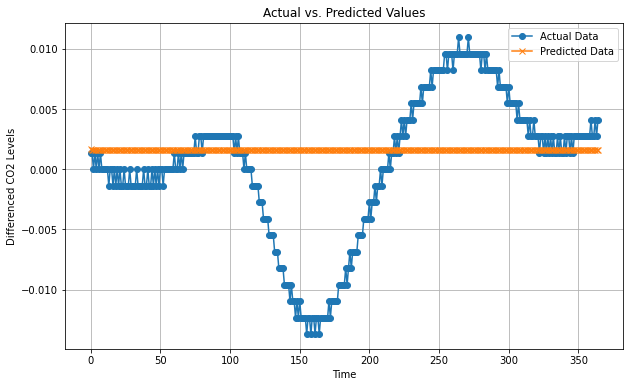

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the data to numpy arrays if not already
test_data_array = np.array(test_data)
forecast_array = np.array(forecast)

# If the data does not have an explicit index, create a simple integer index
index = np.arange(len(test_data))

# Now, plot the data using these arrays and the created index
plt.figure(figsize=(10, 6))
plt.plot(index, test_data_array, label='Actual Data', marker='o')
plt.plot(index, forecast_array, label='Predicted Data', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Differenced CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()


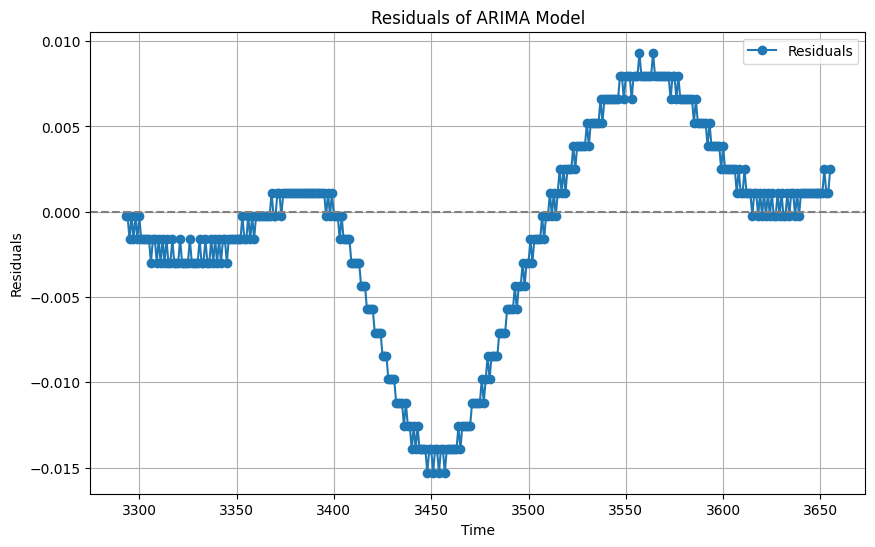

Ljung-Box test statistic: lb_stat
Ljung-Box test p-value: lb_pvalue


In [14]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Compute residuals
residuals = test_data - forecast

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', marker='o')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

# Ljung-Box test
lb_value, lb_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=False)
print("Ljung-Box test statistic:", lb_value)
print("Ljung-Box test p-value:", lb_pvalue)


In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ensure residuals are a numeric array without NaNs
residuals = np.array(residuals.dropna())  # Assuming residuals are stored in a Pandas Series

# Run Ljung-Box test safely
if len(residuals) > 10:  # Ensure there are enough data points
    lb_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print("Ljung-Box test result:\n", lb_result)
else:
    print("Not enough data points to run Ljung-Box test for 10 lags.")


Ljung-Box test result:
         lb_stat  lb_pvalue
10  3505.607048        0.0


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Prog

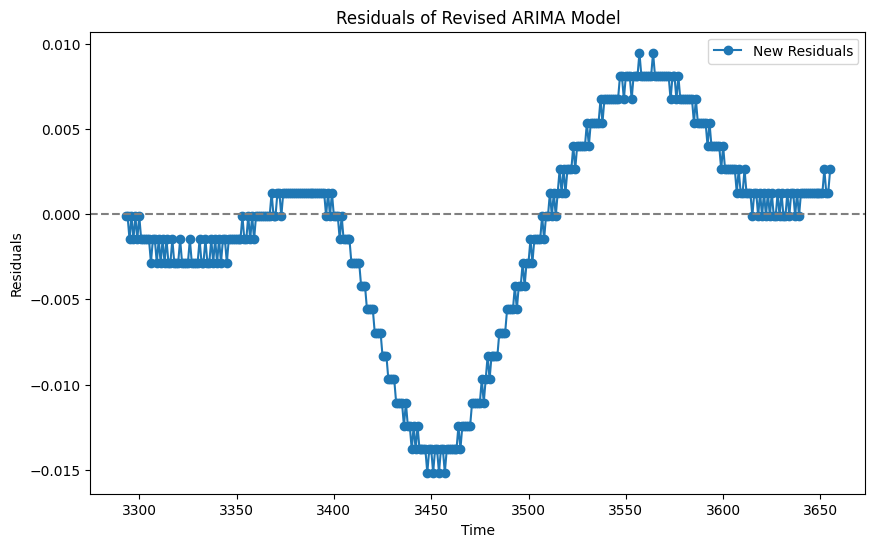

New Ljung-Box test result:
         lb_stat  lb_pvalue
10  3505.616798        0.0


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Example: Increasing model complexity
model = ARIMA(train_data, order=(2, 1, 2))  # Adjust 'order' based on diagnostic outcomes
model_fit = model.fit()

# Forecast, evaluate, and diagnose the new model as done previously
forecast = model_fit.forecast(steps=len(test_data))
new_residuals = test_data - forecast

# Plot new residuals and re-run Ljung-Box test
plt.figure(figsize=(10, 6))
plt.plot(new_residuals, label='New Residuals', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals of Revised ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

new_lb_result = acorr_ljungbox(new_residuals.dropna(), lags=[10], return_df=True)
print("New Ljung-Box test result:\n", new_lb_result)


In [ ]:
#sarima

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


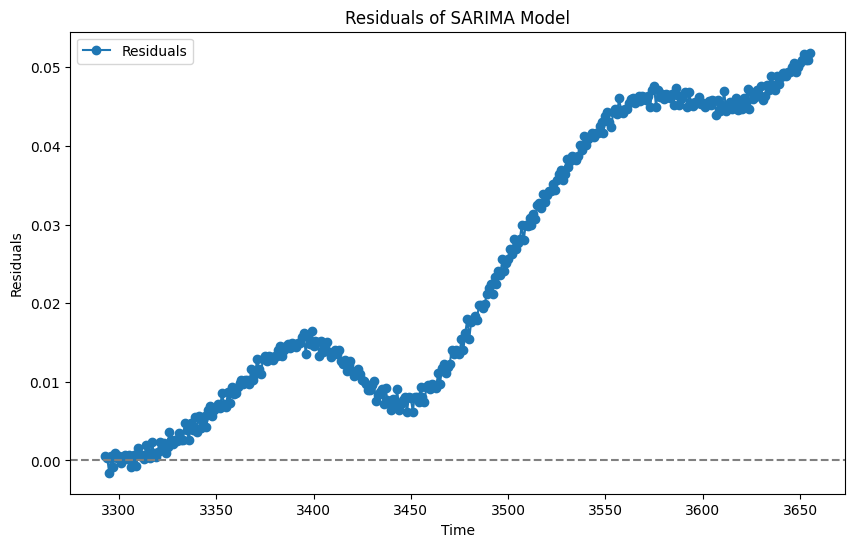

Ljung-Box test result:
         lb_stat  lb_pvalue
10  3436.670832        0.0


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example SARIMA model specification, assuming a potential yearly seasonality
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast and calculate residuals
forecast = model_fit.forecast(steps=len(test_data))
residuals = test_data - forecast

# Residual plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals of SARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Re-run Ljung-Box test
lb_result = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
print("Ljung-Box test result:\n", lb_result)


In [ ]:
#sarima

In [18]:
import pandas as pd

# Load the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
co2_data = pd.read_csv(file_path)

# Display the first few rows and data info to understand its structure
co2_data.head(), co2_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3658 non-null   int64  
 1   year        3658 non-null   int64  
 2   month       3658 non-null   int64  
 3   day         3658 non-null   int64  
 4   cycle       3658 non-null   float64
 5   trend       3658 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 171.6 KB


(   Unnamed: 0  year  month  day   cycle   trend
 0           0  2013      1   20  395.64  394.41
 1           1  2013      1   21  395.67  394.42
 2           2  2013      1   22  395.69  394.43
 3           3  2013      1   23  395.72  394.43
 4           4  2013      1   24  395.75  394.44,
 None)

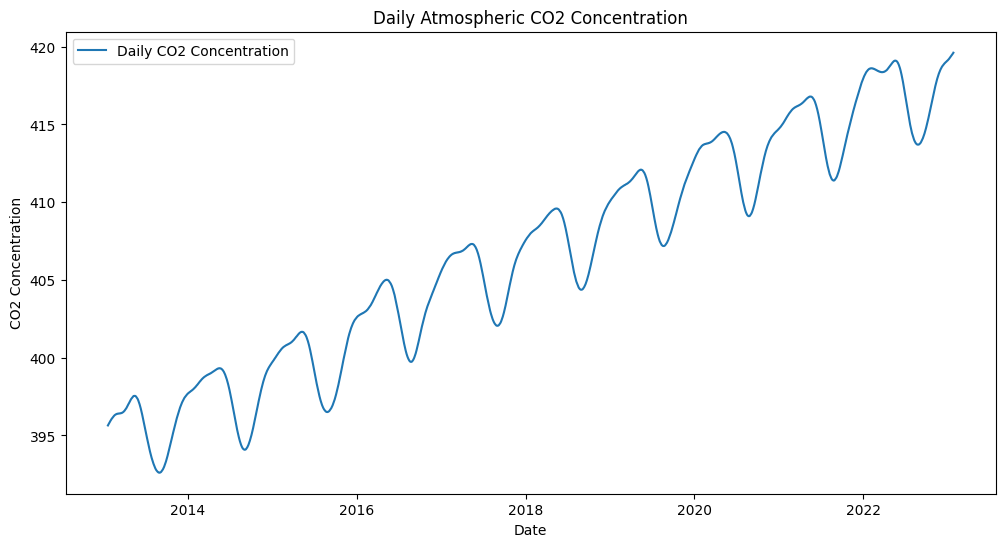

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('Daily atmospheric CO2 concentration.csv')

# Combine year, month, day into a datetime column and set as index
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Drop unnecessary columns
data.drop(columns=['Unnamed: 0', 'year', 'month', 'day'], inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data['cycle'], label='Daily CO2 Concentration')
plt.title('Daily Atmospheric CO2 Concentration')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(data['cycle'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -1.435161459170027
p-value: 0.5653080782144396
Critial Values:
   1%, -3.4321542277654946
Critial Values:
   5%, -2.8623372071683546
Critial Values:
   10%, -2.567194365720777


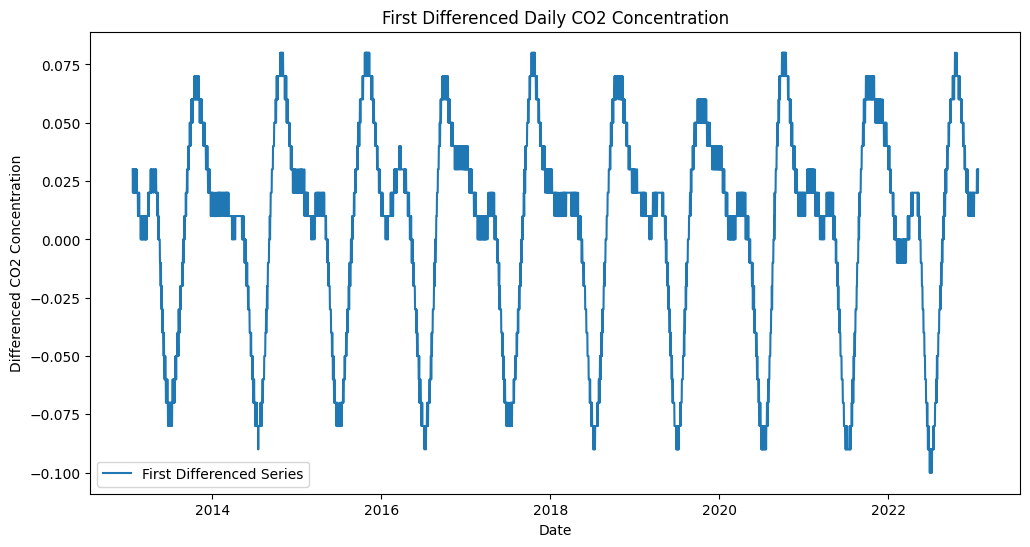

In [21]:
# Apply first differencing
data['cycle_diff'] = data['cycle'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(data['cycle_diff'], label='First Differenced Series')
plt.title('First Differenced Daily CO2 Concentration')
plt.xlabel('Date')
plt.ylabel('Differenced CO2 Concentration')
plt.legend()
plt.show()


In [22]:
# Perform Augmented Dickey-Fuller test on the differenced series
adf_result_diff = adfuller(data['cycle_diff'].dropna())

print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')
for key, value in adf_result_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -4.307904225001337
p-value: 0.0004304185280259732
Critial Values:
   1%, -3.432154725699155
Critial Values:
   5%, -2.8623374271161723
Critial Values:
   10%, -2.567194482813802


In [23]:
# Perform Augmented Dickey-Fuller test on the first differenced series
adf_result_diff = adfuller(data['cycle_diff'].dropna())

print(f'ADF Statistic: {adf_result_diff[0]}')
print(f'p-value: {adf_result_diff[1]}')
for key, value in adf_result_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -4.307904225001337
p-value: 0.0004304185280259732
Critial Values:
   1%, -3.432154725699155
Critial Values:
   5%, -2.8623374271161723
Critial Values:
   10%, -2.567194482813802


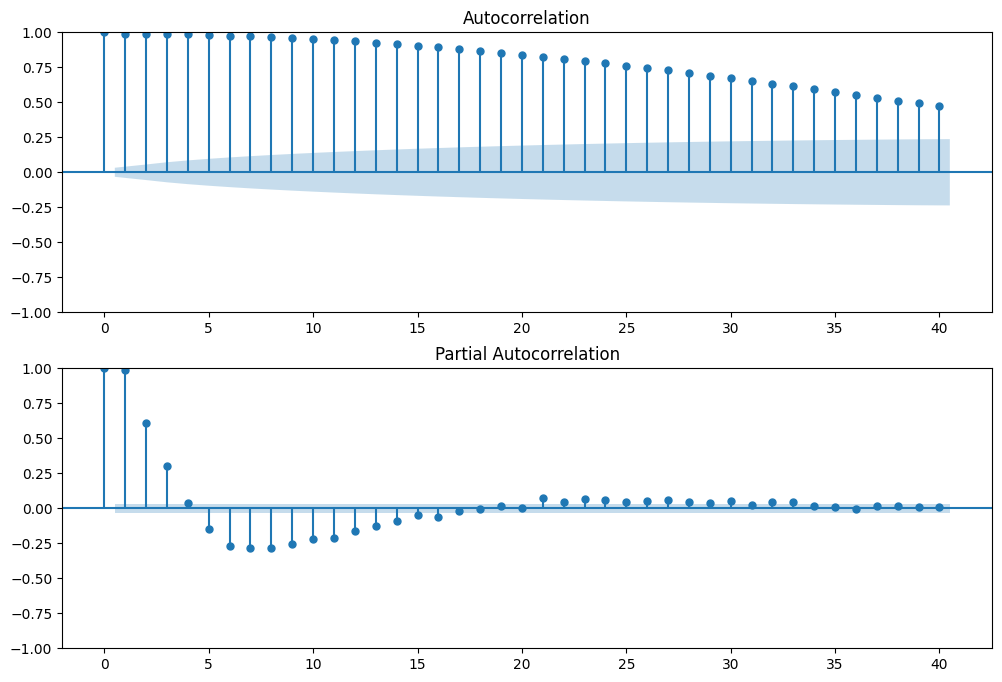

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['cycle_diff'].dropna(), lags=40, ax=axes[0])
plot_pacf(data['cycle_diff'].dropna(), lags=40, ax=axes[1])
plt.show()


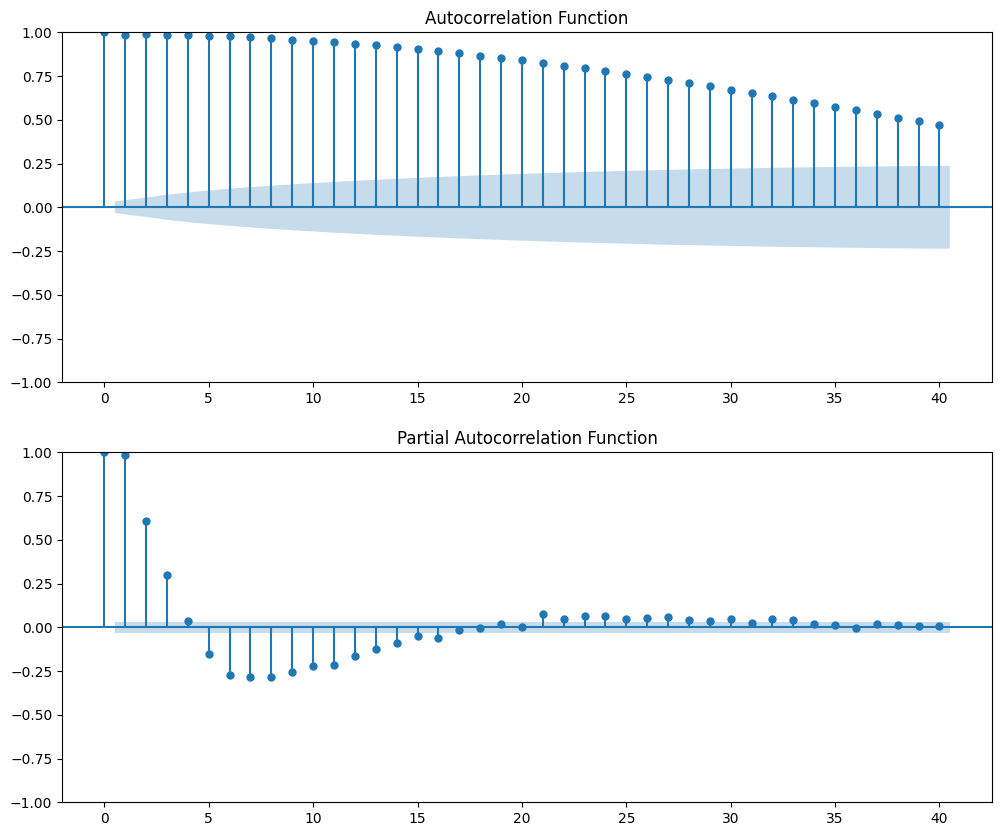

In [25]:
# Plotting the ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(data['cycle_diff'].dropna(), lags=40, ax=axes[0], title='Autocorrelation Function')
plot_pacf(data['cycle_diff'].dropna(), lags=40, ax=axes[1], title='Partial Autocorrelation Function')
plt.show()


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              cycle   No. Observations:                 3658
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               13598.762
Date:                            Mon, 13 May 2024   AIC                         -27187.525
Time:                                    15:06:23   BIC                         -27156.539
Sample:                                01-20-2013   HQIC                        -27176.487
                                     - 01-25-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9976      0.001    830.665      0.000       0.995       1.000
ma.L1         -0.5971      0.017   

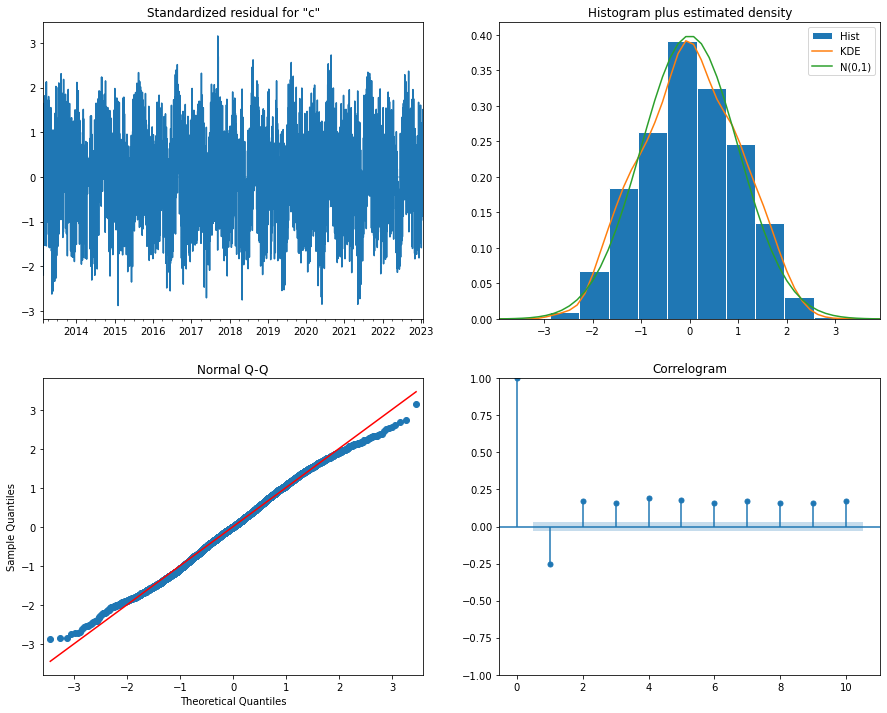

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(data['cycle'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Print out summary
print(sarima_result.summary())
#validation
# Diagnostic plots
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()


Standardized Residuals: The plot shows fluctuations but no obvious patterns, suggesting the model captures much of the data's dynamics. However, the presence of high spikes might indicate occasional model misfits or the influence of outliers.
Histogram and KDE: The distribution of residuals appears approximately normal, but with some deviations as indicated by the Jarque-Bera test result, which suggests that the residuals are not perfectly normally distributed.
Q-Q Plot: This plot indicates that the residuals largely follow the expected normal distribution, with some deviations in the tails. This can be typical in real-world data and might suggest the presence of outliers or heavy tails in the distribution.
Correlogram (ACF of Residuals): Shows that there is significant autocorrelation at lag 1 (beyond the confidence bounds), which is a concern as it suggests the model might not be capturing all the autocorrelative structures in the data

#visualization

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


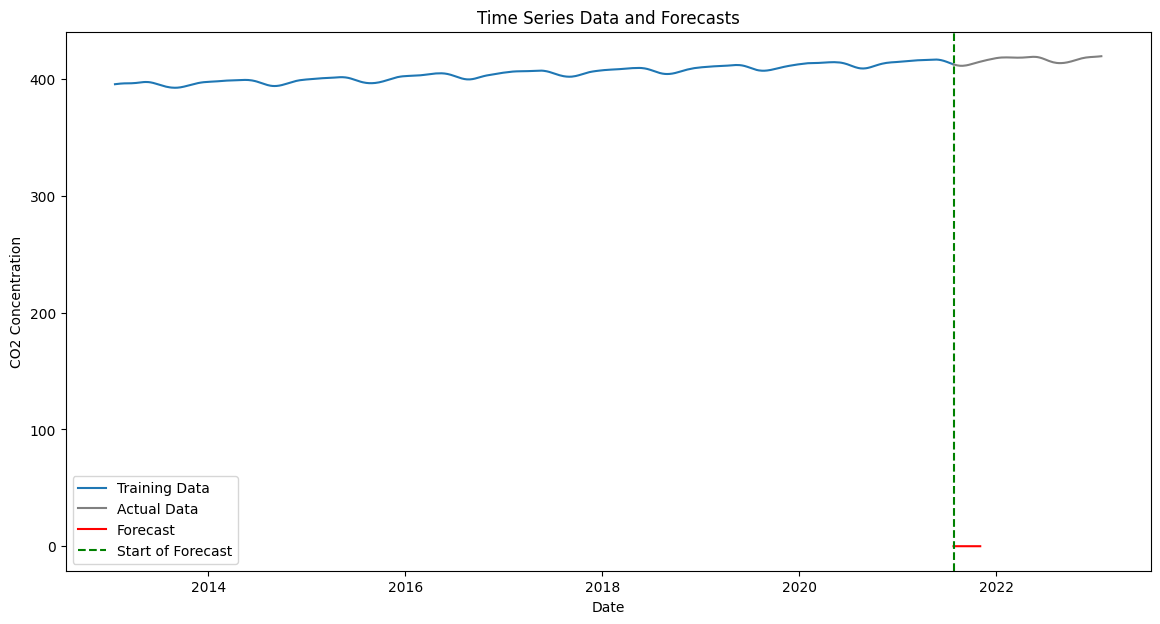

In [27]:
import matplotlib.pyplot as plt
import numpy as np  # Ensure NumPy is imported

# Prepare the data and the dates as NumPy arrays
dates = np.array(data.index)  # Convert index to NumPy array for safe plotting
actual_data_array = np.array(data['cycle'])  # Convert Pandas series to NumPy array

# Assuming forecast_horizon and end_train are defined
forecast_horizon = 100
end_train = int(len(data) * 0.85)

# Assume model_fit is already the fitted SARIMAX model from previous steps
forecast = model_fit.forecast(steps=forecast_horizon)
forecast_array = np.array(forecast)  # Ensure forecast is also a NumPy array

# Dates for the forecast period
forecast_dates = dates[end_train:end_train + forecast_horizon]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(dates[:end_train], actual_data_array[:end_train], label='Training Data')
plt.plot(dates[end_train:], actual_data_array[end_train:], label='Actual Data', color='gray')
plt.plot(forecast_dates, forecast_array, label='Forecast', color='red')
plt.axvline(x=dates[end_train], color='green', linestyle='--', label='Start of Forecast')
plt.title('Time Series Data and Forecasts')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


raining Data (Blue Line):

Shows the historical data used to train the SARIMA model. This sets the context for understanding the model's input and how it has learned the underlying patterns up to the start of the forecast.
Actual Data (Gray Line):

The continuation of the time series that shows real observations beyond the training data. This is crucial for comparing the model's forecasts against actual outcomes.
Forecasts (Red Line):

The predictions made by the SARIMA model. These are plotted starting from the point where the training data ends, marked by the vertical green dashed line.
Start of Forecast (Green Dashed Line):

This line marks the transition point between historical data used for training and the forecast period. It clearly shows where the model starts predicting unseen data.

In [ ]:
#ets

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Fit Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit()
ses_aic = ses_model.aic

# Fit Double Exponential Smoothing (Holt's Method)
holt_model = ExponentialSmoothing(train_data, trend='add').fit()
holt_aic = holt_model.aic

# Fit Triple Exponential Smoothing (Holt-Winters Method)
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()
hw_aic = hw_model.aic

# Compare AIC values
print("Simple Exponential Smoothing (SES) AIC:", ses_aic)
print("Double Exponential Smoothing (Holt's Method) AIC:", holt_aic)
print("Triple Exponential Smoothing (Holt-Winters Method) AIC:", hw_aic)

# Select the model with the lowest AIC
best_model = min((ses_model, holt_model, hw_model), key=lambda x: x.aic)

# Forecasting with the selected model
forecast = best_model.forecast(steps=len(test_data))


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Simple Exponential Smoothing (SES) AIC: -46983.74948810762
Double Exponential Smoothing (Holt's Method) AIC: -48239.80982360824
Triple Exponential Smoothing (Holt-Winters Method) AIC: -48156.77568140607


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Load the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)

# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Select the 'cycle' column for fitting the ETS model
cycle_data = data['cycle']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

# Fit Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit()

# Fit Double Exponential Smoothing (Holt's Method)
holt_model = ExponentialSmoothing(train_data, trend='add').fit()

# Fit Triple Exponential Smoothing (Holt-Winters Method)
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()

# Evaluate model fit using AIC
ses_aic = ses_model.aic
holt_aic = holt_model.aic
hw_aic = hw_model.aic

# Compare AIC values
print("Simple Exponential Smoothing (SES) AIC:", ses_aic)
print("Double Exponential Smoothing (Holt's Method) AIC:", holt_aic)
print("Triple Exponential Smoothing (Holt-Winters Method) AIC:", hw_aic)

# Select the model with the lowest AIC
best_model = min((ses_model, holt_model, hw_model), key=lambda x: x.aic)

# Forecasting with the selected model
forecast = best_model.forecast(steps=len(test_data))

# Convert forecast to a numpy array
forecast_values = np.array(forecast)

# Create datetime index for forecasted values
forecast_dates = pd.date_range(start=test_data.index[-1], periods=len(test_data)+1, freq='D')[1:]

# Evaluation
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


# Select the model with the lowest BIC
best_model = min((ses_model, holt_model, hw_model), key=lambda x: x.bic)

# Convert index to a list of timestamps

forecast_dates_np = np.array(forecast_dates)

# Plotting
# plt.figure(figsize=(14, 7))
# plt.plot(train_dates, train_data.values, label='Training Data')
# plt.plot(test_dates, test_data.values, label='Test Data')
# plt.plot(forecast_dates_np, forecast_values, label='Forecast', color='red')
# plt.title('SES Model Forecast vs Actual Data')
# plt.xlabel('Date')
# plt.ylabel('CO2 Concentration')
# plt.legend()
# plt.show()


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Simple Exponential Smoothing (SES) AIC: -19617.678594621444
Double Exponential Smoothing (Holt's Method) AIC: -32646.372603515058
Triple Exponential Smoothing (Holt-Winters Method) AIC: -32629.58166413192
Mean Absolute Error: 25.73
Mean Squared Error: 858.86
Root Mean Squared Error: 29.31


In [ ]:
#with bic

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Load the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)

# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Select the 'cycle' column for fitting the ETS model
cycle_data = data['cycle']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

# Fit Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit()

# Fit Double Exponential Smoothing (Holt's Method)
holt_model = ExponentialSmoothing(train_data, trend='add').fit()

# Fit Triple Exponential Smoothing (Holt-Winters Method)
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()

# Evaluate model fit using BIC
ses_bic = ses_model.bic
holt_bic = holt_model.bic
hw_bic = hw_model.bic

# Compare BIC values
print("Simple Exponential Smoothing (SES) BIC:", ses_bic)
print("Double Exponential Smoothing (Holt's Method) BIC:", holt_bic)
print("Triple Exponential Smoothing (Holt-Winters Method) BIC:", hw_bic)

# Select the model with the lowest BIC
best_model = min((ses_model, holt_model, hw_model), key=lambda x: x.bic)

# Forecasting with the selected model
forecast = best_model.forecast(steps=len(test_data))

# Convert forecast to a numpy array
forecast_values = np.array(forecast)

# Create datetime index for forecasted values
forecast_dates = pd.date_range(start=test_data.index[-1], periods=len(test_data)+1, freq='D')[1:]

# Evaluation
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Simple Exponential Smoothing (SES) BIC: -19605.594481801327
Double Exponential Smoothing (Holt's Method) BIC: -32622.204377874823
Triple Exponential Smoothing (Holt-Winters Method) BIC: -32532.908761570983
Mean Absolute Error: 25.73
Mean Squared Error: 858.86
Root Mean Squared Error: 29.31


In [ ]:
#with bic

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


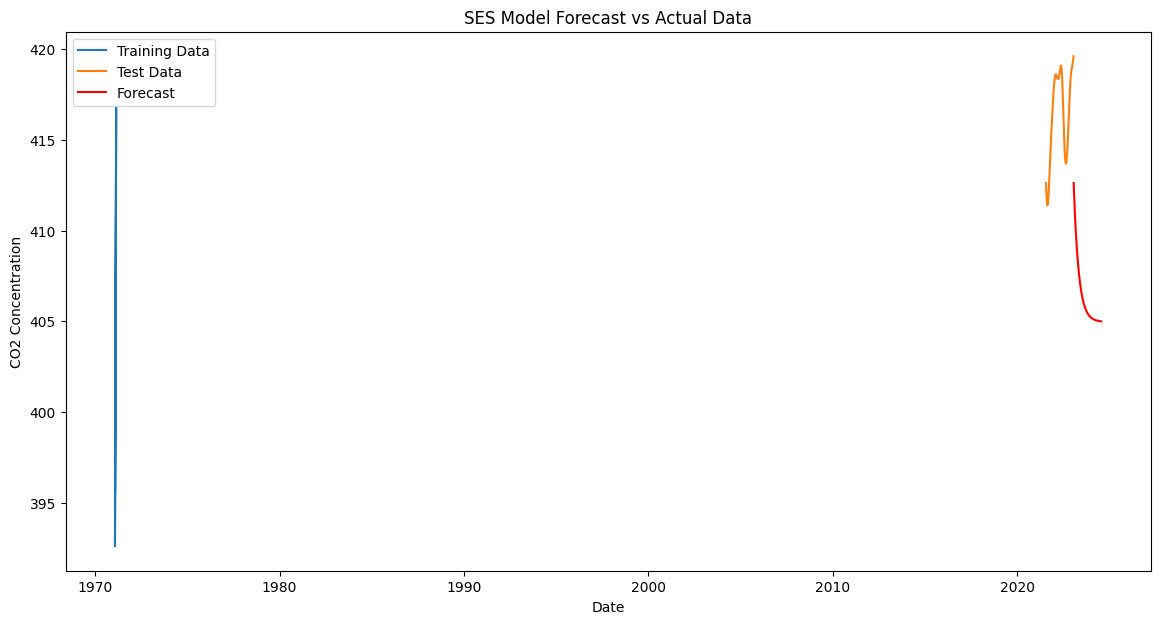

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Load the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)

# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Select the 'cycle' column for fitting the ETS model
cycle_data = data['cycle']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

# Fit Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train_data).fit()

# Fit Double Exponential Smoothing (Holt's Method)
holt_model = ExponentialSmoothing(train_data, trend='add').fit()

# Fit Triple Exponential Smoothing (Holt-Winters Method)
hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()





# Convert forecast to numpy arrays

forecast_values_bic = np.array(forecast_values)

# Create datetime index for forecasted values
forecast_dates = pd.date_range(start=test_data.index[-1], periods=len(test_data)+1, freq='D')[1:]




# Convert index and values of test_data to numpy arrays
test_dates = np.array(test_data.index)
test_values = np.array(test_data.values)

# Plotting
# Convert index and values of test_data to numpy arrays
# Convert index and values of test_data to numpy arrays
test_dates_np = np.array(test_data.index)
test_values_np = np.array(test_data.values)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train_data, train_data.values, label='Training Data')
plt.plot(test_dates_np, test_values_np, label='Test Data')
plt.plot(forecast_dates_np, forecast_values, label='Forecast', color='red')
plt.title('SES Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()




In [ ]:
#validation

In [33]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the number of folds for cross-validation
n_splits = 5

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store evaluation metrics
mae_scores = []
mse_scores = []
rmse_scores = []

# Perform Time Series Cross-Validation
for train_index, val_index in tscv.split(train_data):
    # Split data into training and validation sets
    X_train, X_val = train_data.iloc[train_index], train_data.iloc[val_index]
    
    # Fit the model on the training data
    Best_model_aic = min((ses_model, holt_model, hw_model), key=lambda x: x.aic)
    model = Best_model_aic
    
    # Make predictions on the validation data
    forecast = model.forecast(steps=len(X_val))
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(X_val, forecast)
    mse = mean_squared_error(X_val, forecast)
    rmse = np.sqrt(mse)
    
    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Calculate average scores
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)

# Print average scores
print("Average MAE:", avg_mae)
print("Average MSE:", avg_mse)
print("Average RMSE:", avg_rmse)


Average MAE: 16.723199177410645
Average MSE: 412.4646344823747
Average RMSE: 19.949303101695588


In [ ]:
#visualization

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


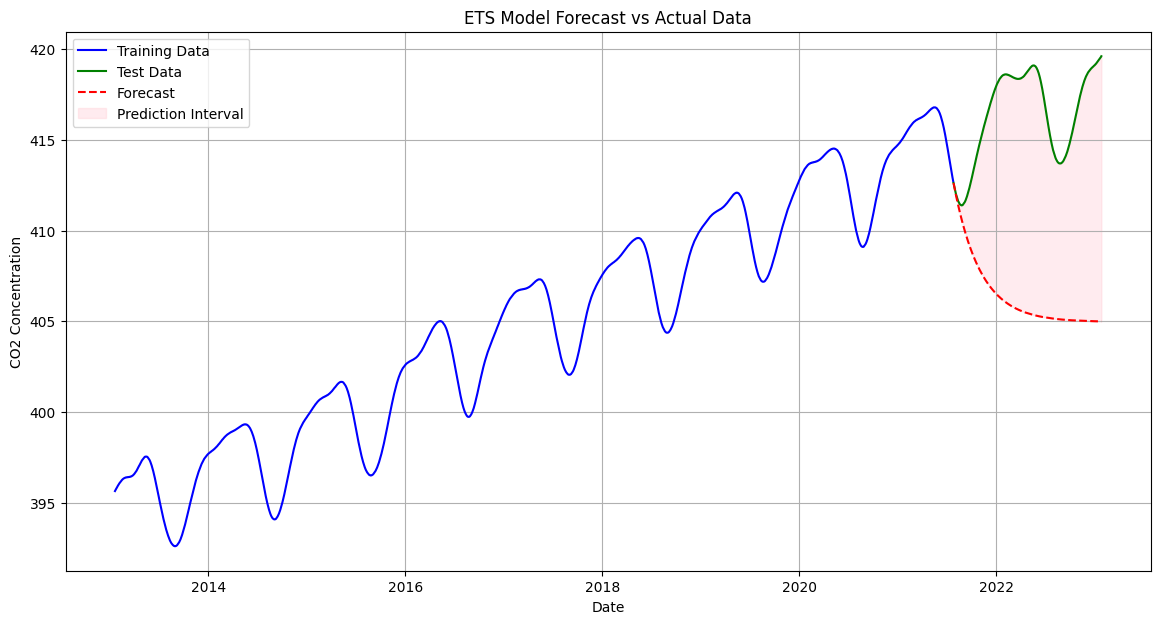

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Load the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)

# Create a datetime index from the year, month, and day columns
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

# Select the 'cycle' column for fitting the ETS model
cycle_data = data['cycle']

# Split the data into training and test sets
train_ratio = 0.85
split_idx = int(len(cycle_data) * train_ratio)
train_data = cycle_data.iloc[:split_idx]
test_data = cycle_data.iloc[split_idx:]

# Fit a Triple Exponential Smoothing model
ets_model = ExponentialSmoothing(train_data,
                                 seasonal='mul', 
                                 seasonal_periods=12,
                                 trend='add',
                                 damped_trend=True,
                                 use_boxcox=True).fit()

# Forecasting
forecast = ets_model.forecast(steps=len(test_data))

# Converting data to numpy arrays for plotting to avoid indexing issues
train_dates = np.array(train_data.index)
train_values = np.array(train_data.values)
test_dates = np.array(test_data.index)
test_values = np.array(test_data.values)
forecast_values = np.array(forecast)

# Plotting using matplotlib, ensuring all data types are explicitly handled
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_values, label='Training Data', color='blue', linestyle='-')
plt.plot(test_dates, test_values, label='Test Data', color='green', linestyle='-')
plt.plot(test_dates, forecast_values, label='Forecast', color='red', linestyle='--')
plt.fill_between(test_dates, test_values, forecast_values, color='pink', alpha=0.3, label='Prediction Interval')
plt.title('ETS Model Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Forecasting
forecast = ets_model.forecast(steps=len(test_data))

# Evaluation
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Mean Absolute Error: 10.08
Mean Squared Error: 117.42
Root Mean Squared Error: 10.84


In [ ]:
#prophet

In [45]:
print(data.head())


            Unnamed: 0  year  month  day   cycle   trend
date                                                    
2013-01-20           0  2013      1   20  395.64  394.41
2013-01-21           1  2013      1   21  395.67  394.42
2013-01-22           2  2013      1   22  395.69  394.43
2013-01-23           3  2013      1   23  395.72  394.43
2013-01-24           4  2013      1   24  395.75  394.44


In [ ]:
#visualization

14:15:05 - cmdstanpy - INFO - Chain [1] start processing
14:15:09 - cmdstanpy - INFO - Chain [1] done processing


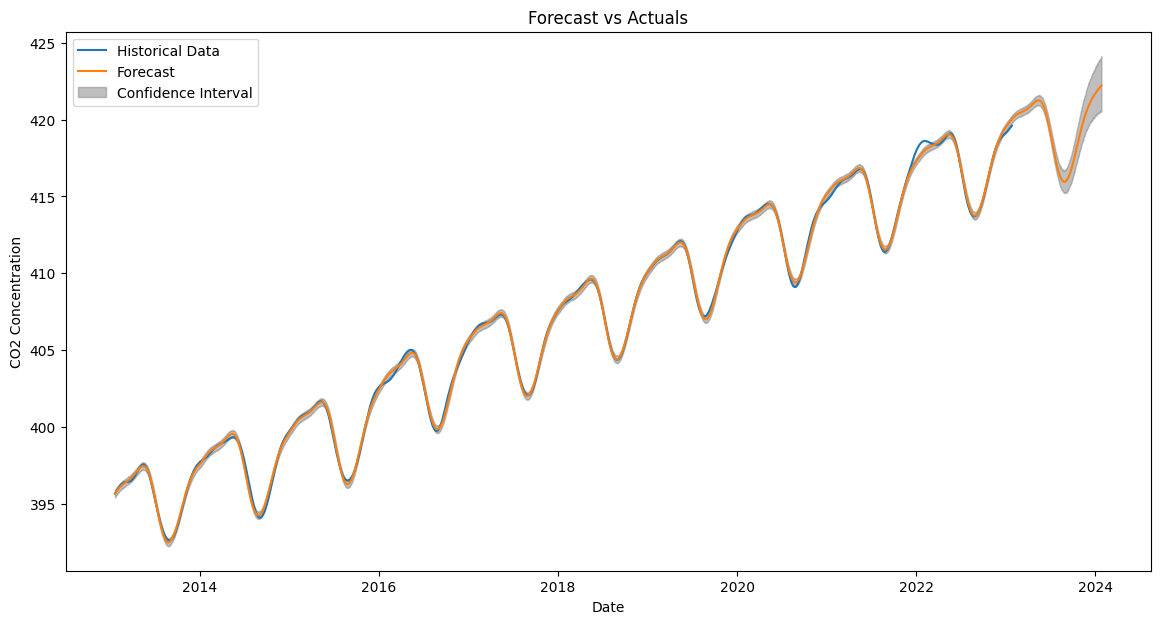

In [48]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is already loaded and prepared
# Initialize the Prophet model
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Load and prepare your data
data = pd.read_csv('Daily atmospheric CO2 concentration.csv')
data['ds'] = pd.to_datetime(data[['year', 'month', 'day']])
data['y'] = data['cycle']

# Fit the model
model.fit(data[['ds', 'y']])

# Make a future dataframe for predictions
future = model.make_future_dataframe(periods=365)  # predict for the next year

# Forecast
forecast = model.predict(future)

# Convert datetime and forecast to numpy arrays for plotting
dates = np.array(forecast['ds'])
yhat = np.array(forecast['yhat'])
yhat_lower = np.array(forecast['yhat_lower'])
yhat_upper = np.array(forecast['yhat_upper'])

# Historical data
history_dates = np.array(data['ds'])
history_y = np.array(data['y'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(history_dates, history_y, label='Historical Data')
plt.plot(dates, yhat, label='Forecast')
plt.fill_between(dates, yhat_lower, yhat_upper, color='gray', alpha=0.5, label='Confidence Interval')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


14:10:54 - cmdstanpy - INFO - Chain [1] start processing
14:10:57 - cmdstanpy - INFO - Chain [1] done processing


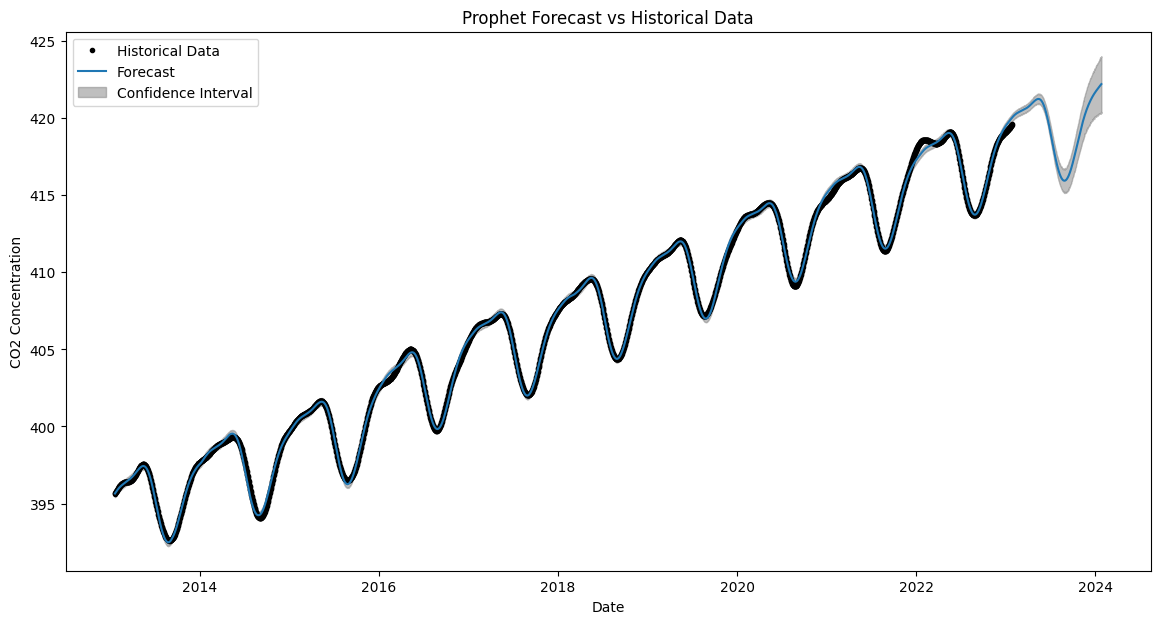

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
import pandas as pd

# Load and prepare your data
data = pd.read_csv('Daily atmospheric CO2 concentration.csv')
data['ds'] = pd.to_datetime(data[['year', 'month', 'day']])
data['y'] = data['cycle']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data[['ds', 'y']])

# Create a future dataframe and predict
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Convert all data for plotting explicitly to numpy arrays to avoid indexing issues
historical_dates = np.array(data['ds'].dt.to_pydatetime())  # Converting dates to numpy array
historical_y = np.array(data['y'])  # Converting data to numpy array
forecast_dates = np.array(forecast['ds'].dt.to_pydatetime())
forecast_y = np.array(forecast['yhat'])
forecast_y_lower = np.array(forecast['yhat_lower'])
forecast_y_upper = np.array(forecast['yhat_upper'])

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(historical_dates, historical_y, 'k.', label='Historical Data')
plt.plot(forecast_dates, forecast_y, label='Forecast')
plt.fill_between(forecast_dates, forecast_y_lower, forecast_y_upper, color='gray', alpha=0.5, label='Confidence Interval')
plt.title('Prophet Forecast vs Historical Data')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()


In [ ]:
#validation test

14:11:06 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/13 [00:00<?, ?it/s]14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:10 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 1/13 [00:02<00:29,  2.43s/it]14:11:11 - cmdstanpy - INFO - Chain [1] start processing
14:11:13 - cmdstanpy - INFO - Chain [1] done processing
 15%|█▌        | 2/13 [00:04<00:27,  2.49s/it]14:11:13 - cmdstanpy - INFO - Chain [1] start processing
14:11:15 - cmdstanpy - INFO - Chain [1] done processing
 23%|██▎       | 3/13 [00:07<00:23,  2.37s/it]14:11:15 - cmdstanpy - INFO - Chain [1] start processing
14:11:18 - cmdstanpy - INFO - Chain [1] done processing
 31%|███       | 4/13 [00:10<00:25,  2.79s/it]14:11:19 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 5/13 [00:14<00:25,  3.20s/it]14:11:23 - cmdstanpy - INFO - Chain [1] start processi

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 37 days  0.124426  0.352741  0.275840  0.000676  0.000554  0.000676   
1 38 days  0.128818  0.358912  0.279918  0.000686  0.000564  0.000687   
2 39 days  0.133335  0.365150  0.283917  0.000696  0.000586  0.000697   
3 40 days  0.137953  0.371420  0.287881  0.000706  0.000605  0.000706   
4 41 days  0.142637  0.377673  0.291803  0.000716  0.000625  0.000716   

   coverage  
0  0.366764  
1  0.370983  
2  0.376339  
3  0.381532  
4  0.385751  


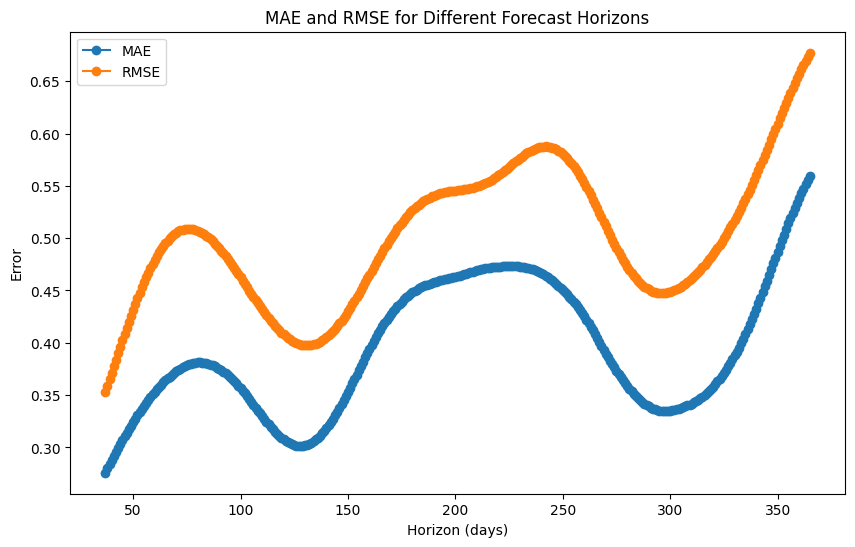

In [47]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Load and prepare your data
data = pd.read_csv('Daily atmospheric CO2 concentration.csv')
data['ds'] = pd.to_datetime(data[['year', 'month', 'day']])
data['y'] = data['cycle']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data)

# Set up cross-validation
df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

# Prepare data for plotting
horizon = np.array(df_p['horizon'].dt.total_seconds() / 86400)  # convert timedelta to days as float
mae = np.array(df_p['mae'])
rmse = np.array(df_p['rmse'])

# Plotting the performance metrics
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(horizon, mae, marker='o', label='MAE')
ax.plot(horizon, rmse, marker='o', label='RMSE')
ax.set_title('MAE and RMSE for Different Forecast Horizons')
ax.set_xlabel('Horizon (days)')
ax.set_ylabel('Error')
ax.legend()
plt.show()
